In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.utils import plot_model
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


Using TensorFlow backend.


/home/roman/PycharmProjects/Example/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


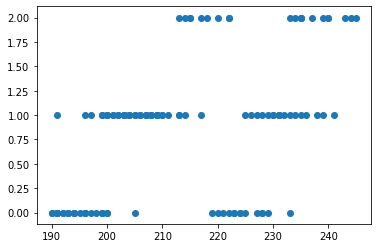

In [3]:
df = pd.read_csv('../data.csv', sep=',', index_col='id')
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
df['mean'] = df[subjects].mean(axis=1)
df[df['year'] == 13]['ege'] = df['ege'] - 30
df = df[:-40]

df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20

df['round'] = np.rint(df['mean'].values)

x = df[['k', 'ege']].values
y = df['round'].values - 3

x_optional = np.array([
    [0.8, 243], [0.8, 239], [0.8, 237], [0.8, 235], [0.8, 234], [0.8, 233], [0.8, 232], [0.8, 231], 
    [0.8, 230], [0.8, 229], [0.8, 228], [0.8, 227], [0.8, 226], [0.8, 225], [0.8, 224], [0.8, 223], 
    [0.8, 222], [0.8, 221], [0.8, 220], [0.8, 219], 
    [0.5, 235], [0.5, 220], [0.5, 218], [0.5, 217], [0.5, 215], [0.5, 214], [0.5, 213], [0.5, 210], 
    [0.5, 209], [0.5, 207], [0.5, 206], [0.5, 205], [0.5, 203], [0.5, 200], [0.5, 199], [0.5, 195], 
    [0.5, 193], [0.5, 192], [0.5, 191], [0.5, 190], 
    [0.3, 244], [0.3, 222], [0.3, 215], [0.3, 213], [0.3, 211], [0.3, 209], [0.3, 206], [0.3, 205], 
    [0.3, 204], [0.3, 203], [0.3, 202], [0.3, 201], [0.3, 200], [0.3, 199], [0.3, 197], [0.3, 196], 
    [0.3, 194], [0.3, 193], [0.3, 191], [0.3, 191]
])
y_optional = np.array([
    2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,
    1,1,1,1,1,1,1,1,0,0,0,0,0])

x = np.concatenate((x, x_optional), axis=0)
y = np.concatenate((y, y_optional), axis=0)

plt.scatter(x[:, 1], y, marker='o')

In [5]:
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
history = model.fit(x, one_hot_labels, epochs=100, batch_size=20, verbose=2, shuffle=True)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 1.0802 - acc: 0.4833
Epoch 2/100
 - 0s - loss: 1.0282 - acc: 0.4833
Epoch 3/100
 - 0s - loss: 0.9747 - acc: 0.4833
Epoch 4/100
 - 0s - loss: 0.9406 - acc: 0.4833
Epoch 5/100
 - 0s - loss: 0.8948 - acc: 0.5083
Epoch 6/100
 - 0s - loss: 0.8410 - acc: 0.5417
Epoch 7/100
 - 0s - loss: 0.7735 - acc: 0.5917
Epoch 8/100
 - 0s - loss: 0.6955 - acc: 0.7000
Epoch 9/100
 - 0s - loss: 0.5976 - acc: 0.7833
Epoch 10/100
 - 0s - loss: 0.5076 - acc: 0.7917
Epoch 11/100
 - 0s - loss: 0.4432 - acc: 0.7667
Epoch 12/100
 - 0s - loss: 0.4205 - acc: 0.7833
Epoch 13/100
 - 0s - loss: 0.3997 - acc: 0.8000
Epoch 14/100
 - 0s - loss: 0.3865 - acc: 0.8000
Epoch 15/100
 - 0s - loss: 0.3788 - acc: 0.7833
Epoch 16/100
 - 0s - loss: 0.3892 - acc: 0.7667
Epoch 17/100
 - 0s - loss: 0.3723 - acc: 0.7917
Epoch 18/100
 - 0s - loss: 0.3727 - acc: 0.7833
Epoch 19/100
 - 0s - loss: 0.3607 - acc: 0.7917
Epoch 20/100
 - 0s - loss: 0.3660 - acc: 0.7833
E

In [7]:
x_test = np.array([
    [0.8, 220], [0.8, 224], [0.8, 230], [0.8, 234], [0.8, 240], [0.8, 245], [0.8, 250], [0.8, 260],
    # [0.5, 190], [0.5, 195], [0.5, 200], [0.5, 205], [0.5, 210], [0.5, 215], [0.5, 220], [0.5, 225],
    # [0.3, 190], [0.3, 195], [0.3, 200], [0.3, 205], [0.3, 210], [0.3, 215], [0.3, 220], [0.3, 225]
    
])
classes = model.predict(x_test, batch_size=128)
np.set_printoptions(precision=4, suppress=True)
classes

array([[0.8045, 0.007 , 0.8356],
       [0.9978, 0.0006, 0.0005],
       [0.0004, 0.9992, 0.0002],
       [0.0039, 0.8535, 0.8717],
       [0.0012, 0.0011, 0.9993],
       [0.0024, 0.0021, 0.9988],
       [0.316 , 0.6276, 0.1868],
       [0.3408, 0.5641, 0.182 ]], dtype=float32)

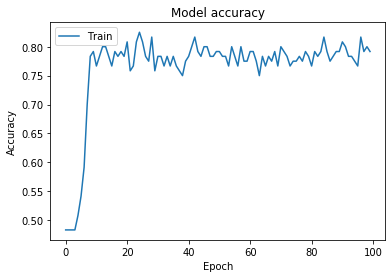

In [8]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

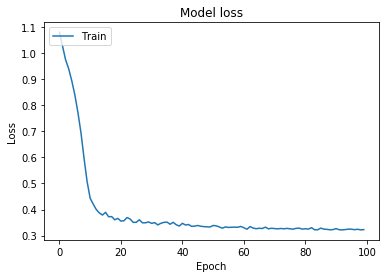

In [9]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### пронозирование за 16 год


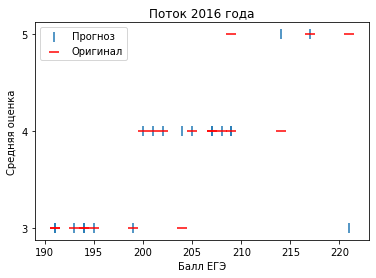

In [29]:
df = pd.read_csv('../data.csv', sep=',', index_col='id')
df['mean'] = df[subjects].mean(axis=1)

df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20 + [0.3] * 20 + [0.3] * 20 

x_16 = df[df['year'] == 16][['k', 'ege']].values

y_predicted = model.predict(x_16, batch_size=10)

y = list(map(lambda y : y.argmax() + 3, y_predicted))

marker_size = [100 for i in range(len(x))]
plt.scatter(x_16[:, 1], y, marker='|', s=marker_size)

plt.scatter(x_16[:, 1], np.round(df[df['year'] == 16]['mean']), color='red', marker='_', s=marker_size)

plt.title('Поток 2016 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')

plt.legend(['Прогноз', 'Оригинал'])
plt.yticks(np.arange(3, 6, 1))
plt.savefig('16_pred_original.png', dpi=300)


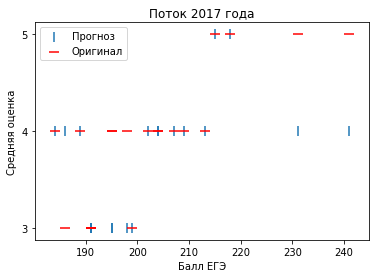

In [31]:
df = pd.read_csv('../data.csv', sep=',', index_col='id')
df['mean'] = df[subjects].mean(axis=1)

df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20 + [0.3] * 20 + [0.3] * 20 

x_17 = df[df['year'] == 17][['k', 'ege']].values

y_predicted = model.predict(x_17, batch_size=10)

y = list(map(lambda y : y.argmax() + 3, y_predicted))

marker_size = [100 for i in range(len(x))]
plt.scatter(x_17[:, 1], y, marker='|', s=marker_size)

plt.scatter(x_17[:, 1], np.round(df[df['year'] == 17]['mean']), color='red', marker='_', s=marker_size)

plt.title('Поток 2017 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')

plt.legend(['Прогноз', 'Оригинал'])
plt.yticks(np.arange(3, 6, 1))
plt.savefig('17_pred_original.png', dpi=300)
